In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cabs-fare-data/Cab_Data.csv
/kaggle/input/cabs-fare-data/City.csv
/kaggle/input/cabs-fare-data/Customer_ID.csv
/kaggle/input/cabs-fare-data/Transaction_ID.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
cab_data=pd.read_csv('/kaggle/input/cabs-fare-data/Cab_Data.csv')
customer=pd.read_csv('/kaggle/input/cabs-fare-data/Customer_ID.csv')
transaction=pd.read_csv('/kaggle/input/cabs-fare-data/Transaction_ID.csv')
city=pd.read_csv('/kaggle/input/cabs-fare-data/City.csv')

In [5]:
cab_data.head(1000)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
...,...,...,...,...,...,...,...
995,10001305,11-01-2016,Yellow Cab,WASHINGTON DC,33.48,658.10,482.112
996,10001306,11-01-2016,Yellow Cab,WASHINGTON DC,39.00,774.12,496.080
997,10001307,06-01-2016,Yellow Cab,WASHINGTON DC,29.97,571.78,431.568
998,10001308,03-01-2016,Yellow Cab,WASHINGTON DC,31.03,723.56,390.978


In [6]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
customer.shape

(49171, 4)

In [173]:
city.head()

,City,Population,Users,User perecentage
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756


In [9]:
transaction.shape

(440098, 3)

In [10]:
print(cab_data.shape)
print(customer.shape)
print(transaction.shape)
print(city.shape)

(359392, 7)
(49171, 4)
(440098, 3)
(20, 3)


In [11]:
cab_data.isnull().sum()
cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [12]:
cab_data['Profit']=cab_data['Price Charged']-cab_data['Cost of Trip']

In [13]:
#
cab_data['Cost per KM']=cab_data['Cost of Trip']/cab_data['KM Travelled']
cab_data['profit per KM']=cab_data['Profit']/cab_data['KM Travelled']
cab_data['Net profit perecentage']=(cab_data['Profit']/cab_data['Cost of Trip'])*100



In [14]:
merged_df = pd.merge(transaction, customer, on='Customer ID', how='left')

In [15]:
merged_df.head(100)


,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536
...,...,...,...,...,...,...
95,10000106,7317,Card,Male,19,16209
96,10000107,6343,Card,Male,42,17207
97,10000108,6941,Cash,Male,54,17067
98,10000109,7974,Cash,Male,41,21855


In [16]:
merged_df.isnull().sum()
merged_df.isna().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [17]:
merged_df['Transaction ID'].duplicated().sum()

0

In [18]:
final_df = pd.merge(cab_data, merged_df, on='Transaction ID', how='left')

In [19]:
final_df['Date of Travel'] = pd.to_datetime(final_df['Date of Travel'])

# add a new column that classifies dates into weekday and weekend
final_df['Day type'] = final_df['Date of Travel'].apply(lambda x: 'Weekday' if x.weekday() < 5 else 'Weekend')

In [20]:
final_df['Day type'].value_counts()

Weekday    227788
Weekend    131604
Name: Day type, dtype: int64

In [21]:
final_df['Transaction ID'].duplicated().sum()
final_df.isnull().sum()
final_df.isna().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Profit                    0
Cost per KM               0
profit per KM             0
Net profit perecentage    0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Day type                  0
dtype: int64

In [22]:
remove_commas_spaces = lambda x: x.replace(',', '').replace(' ', '')

# apply the lambda function to the 'Numbers' column
city['Population'] = city['Population'].apply(remove_commas_spaces)
city['Users'] = city['Users'].apply(remove_commas_spaces)


In [23]:
city['Population'] = city['Population'].astype(int)
city['Users'] = city['Users'].astype(int)

In [24]:
city['User perecentage']=(city['Users']/city['Population'])*100

In [25]:
final_df['Year'] = final_df['Date of Travel'].dt.year
final_df['Month'] = final_df['Date of Travel'].dt.month

In [26]:
final_df.head(100)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Cost per KM,profit per KM,Net profit perecentage,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Day type,Year,Month
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,10.3,1.882266,18.274427,29290,Card,Male,28,10813,Weekday,2016,8
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,11.7,0.826904,7.067558,27703,Card,Male,27,9237,Weekday,2016,6
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,10.8,3.049558,28.236644,28712,Cash,Male,53,11242,Weekday,2016,2
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,10.6,0.777751,7.337273,28020,Cash,Male,23,23327,Weekday,2016,7
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,11.2,1.929439,17.227131,27182,Card,Male,33,8536,Weekday,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10000106,2016-12-01,Pink Cab,LOS ANGELES CA,29.12,554.83,343.616,211.214,11.8,7.253228,61.468034,7317,Card,Male,19,16209,Weekday,2016,12
96,10000107,2016-08-01,Pink Cab,LOS ANGELES CA,27.60,494.32,311.880,182.440,11.3,6.610145,58.496858,6343,Card,Male,42,17207,Weekday,2016,8
97,10000108,2016-03-01,Pink Cab,LOS ANGELES CA,9.36,203.31,96.408,106.902,10.3,11.421154,110.884989,6941,Cash,Male,54,17067,Weekday,2016,3
98,10000109,2016-03-01,Pink Cab,LOS ANGELES CA,5.10,120.26,52.530,67.730,10.3,13.280392,128.935846,7974,Cash,Male,41,21855,Weekday,2016,3


In [190]:
#1Total revenue
pink_revenue,yellow_revenue=final_df.groupby('Company')['Price Charged'].sum()
#print(pink)
#print(yellow)

#2Total profit
pink_profit,yellow_profit=final_df.groupby('Company')['Profit'].sum()
#print(profit_pink)
#print(profit_yellow)

#3mean profit perecentage
Mprofit_pink,Mprofit_yellow=final_df.groupby('Company')['Net profit perecentage'].mean()
print('mean pink profit',Mprofit_pink)
print('Mean yellow profit',Mprofit_yellow)
#Annaul profit trends

#4profit perecentages
pink_mean=(pink_profit/pink_revenue)*100
yellow_mean=(yellow_profit/yellow_revenue)*100
print('Pink profit perecentage',pink_mean)
print('Yellow profit perecentage',yellow_mean)

#5Average no.of rides per day
#counts = final_df.groupby(['Company', 'Date of Travel']).size()
#dailyrides_pink,dailyrides_yellow= counts.groupby('Company').mean()
#print("average daily rides pink:",dailyrides_pink)
#print("average daily rides Yellow:",dailyrides_yellow)
#Average rides per day
avg_rides_day=pd.DataFrame(final_df.groupby(['Company','Year'])['Date of Travel'].count())
un_rides_day=pd.DataFrame(final_df.groupby(['Company',"Year"])['Date of Travel'].nunique())
un_rides_day["Date of Travel"]=avg_rides_day['Date of Travel']/un_rides_day['Date of Travel']


#Average rides

#6Profits per year
monthly_2016=pd.DataFrame(final_df[final_df['Year'] == 2016].groupby(['Company', 'Month'])['Profit'].sum())
monthly_2017=pd.DataFrame(final_df[final_df['Year'] == 2017].groupby(['Company', 'Month'])['Profit'].sum())
monthly_2018=pd.DataFrame(final_df[final_df['Year'] == 2018].groupby(['Company', 'Month'])['Profit'].sum())
#Dataframe
yearly_pro=pd.DataFrame(final_df.groupby(['Company', 'Year'])['Profit'].sum())
yearly_pro.head(10)


#7Rides per city
city_rides=pd.DataFrame(final_df.groupby(['Company', 'City'])['Transaction ID'].count())
#8Profit per city
city_pro=pd.DataFrame(final_df.groupby(['Company', 'City'])['Profit'].sum())


#9No of customers
cust_pink,cust_yellow=final_df.groupby('Company')['Customer ID'].nunique()
print('Total no.of pink customers',cust_pink)
print('Total no.of Yellow customers',cust_yellow)



#10customers based on gender
# Count the number of unique male and female customers for both companies
male_customers_pink = final_df[(final_df['Gender'] == 'Male') & (final_df['Company'] == 'Pink Cab')]['Customer ID'].nunique()
female_customers_pink = final_df[(final_df['Gender'] == 'Female') & (final_df['Company'] == 'Pink Cab')]['Customer ID'].nunique()

male_customers_yellow = final_df[(final_df['Gender'] == 'Male') & (final_df['Company'] == 'Yellow Cab')]['Customer ID'].nunique()
female_customers_yellow = final_df[(final_df['Gender'] == 'Female') & (final_df['Company'] == 'Yellow Cab')]['Customer ID'].nunique()

#11Customer age
#12Customer income


##13Average rides per customer
avg_rides_cab=pd.DataFrame(final_df.groupby(['Company','Year'])['Transaction ID'].count())
un_rides_cab=pd.DataFrame(final_df.groupby(['Company',"Year"])['Customer ID'].nunique())
un_rides_cab["Transaction ID"]=avg_rides_cab['Transaction ID']/un_rides_cab['Customer ID']
#un_rides_cab.head(10)








mean pink profit 25.55956682506693
Mean yellow profit 54.296623105509035
Pink profit perecentage 20.15830164517045
Yellow profit perecentage 34.97736474706022
Total no.of pink customers 32330
Total no.of Yellow customers 39896


In [28]:
#Average no.of rides on weekday vs. weekend
weekday_pink=final_df[(final_df['Day type'] == 'Weekday') & (final_df['Company'] == 'Pink Cab')]['Transaction ID'].count()
weekend_pink=final_df[(final_df['Day type'] == 'Weekend') & (final_df['Company'] == 'Pink Cab')]['Transaction ID'].count()

weekday_yellow=final_df[(final_df['Day type'] == 'Weekday') & (final_df['Company'] == 'Yellow Cab')]['Transaction ID'].count()
weekend_yellow=final_df[(final_df['Day type'] == 'Weekend') & (final_df['Company'] == 'Yellow Cab')]['Transaction ID'].count()

avg_weekday_pink=weekday_pink/(final_df[(final_df['Day type'] == 'Weekday') & (final_df['Company'] == 'Pink Cab')]['Date of Travel'].nunique())
avg_weekend_pink=weekend_pink/(final_df[(final_df['Day type'] == 'Weekend') & (final_df['Company'] == 'Pink Cab')]['Date of Travel'].nunique())
avg_weekday_yellow=weekday_yellow/(final_df[(final_df['Day type'] == 'Weekday') & (final_df['Company'] == 'Yellow Cab')]['Date of Travel'].nunique())
avg_weekend_yellow=weekend_yellow/(final_df[(final_df['Day type'] == 'Weekend') & (final_df['Company'] == 'Yellow Cab')]['Date of Travel'].nunique())

print("Average weekday rides pink",avg_weekday_pink)
print("Average weekend rides pink",avg_weekend_pink)
print("Average weeekday rides Yellow",avg_weekday_yellow)
print("Average weekend rides Yellow",avg_weekend_yellow)


#Average profit perecentages on weekdays vs. weekend
print(final_df[(final_df['Company'] == 'Pink Cab') & (final_df['Day type'] == 'Weekday')]['Net profit perecentage'].mean())
print(final_df[(final_df['Company'] == 'Pink Cab') & (final_df['Day type'] == 'Weekend')]['Net profit perecentage'].mean())



print(final_df[(final_df['Company'] == 'Yellow Cab') & (final_df['Day type'] == 'Weekday')]['Net profit perecentage'].mean())
print(final_df[(final_df['Company'] == 'Yellow Cab') & (final_df['Day type'] == 'Weekend')]['Net profit perecentage'].mean())

Average weekday rides pink 68.87323943661971
Average weekend rides pink 98.47452229299363
Average weeekday rides Yellow 222.7887323943662
Average weekend rides Yellow 320.64649681528664
24.00511112752186
28.26368932986785
52.386830820969756
57.59708135491823


In [29]:
# Group the dataframe by Company, Year, and Month, and sum the profits for each group
monthly_profits= final_df.groupby(['Company', 'Year', 'Month'])['Profit'].sum().reset_index()

# Print the resulting dataframe
print(monthly_profits)


       Company  Year  Month        Profit
0     Pink Cab  2016      1  8.280143e+04
1     Pink Cab  2016      2  1.141946e+05
2     Pink Cab  2016      3  1.373917e+05
3     Pink Cab  2016      4  1.000368e+05
4     Pink Cab  2016      5  9.160729e+04
..         ...   ...    ...           ...
67  Yellow Cab  2018      8  1.006257e+06
68  Yellow Cab  2018      9  1.294456e+06
69  Yellow Cab  2018     10  1.288626e+06
70  Yellow Cab  2018     11  1.111310e+06
71  Yellow Cab  2018     12  1.457197e+06

[72 rows x 4 columns]


# # # Plots****

In [30]:
monthly_2016.head(10)

Profit
Company  Month           
Pink Cab 1      64.187154
         2      77.842257
         3      82.766073
         4      64.623254
         5      51.120138
         6      57.324608
         7      55.391928
         8      57.376784
         9      60.499251
         10     75.708885

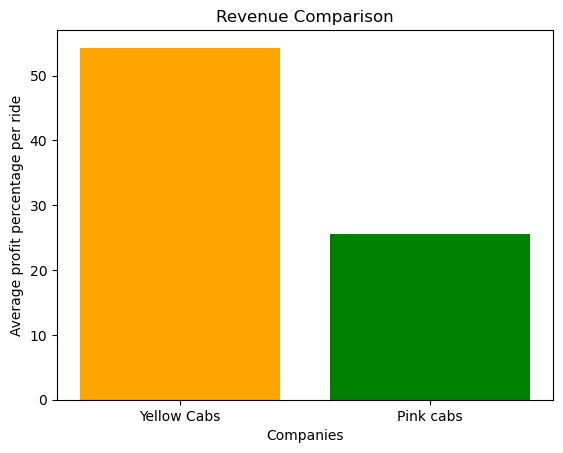

In [143]:


# example data
revenues = [Mprofit_yellow,Mprofit_pink] # revenue for company1 and company2
companies = ['Yellow Cabs', 'Pink cabs']

# create bar chart
plt.bar(companies, revenues, color=['orange', 'green'])

# set axis labels and chart title
plt.xlabel('Companies')
plt.ylabel('Average profit percentage per ride')
plt.title('Revenue Comparison')

# show the chart
plt.show()


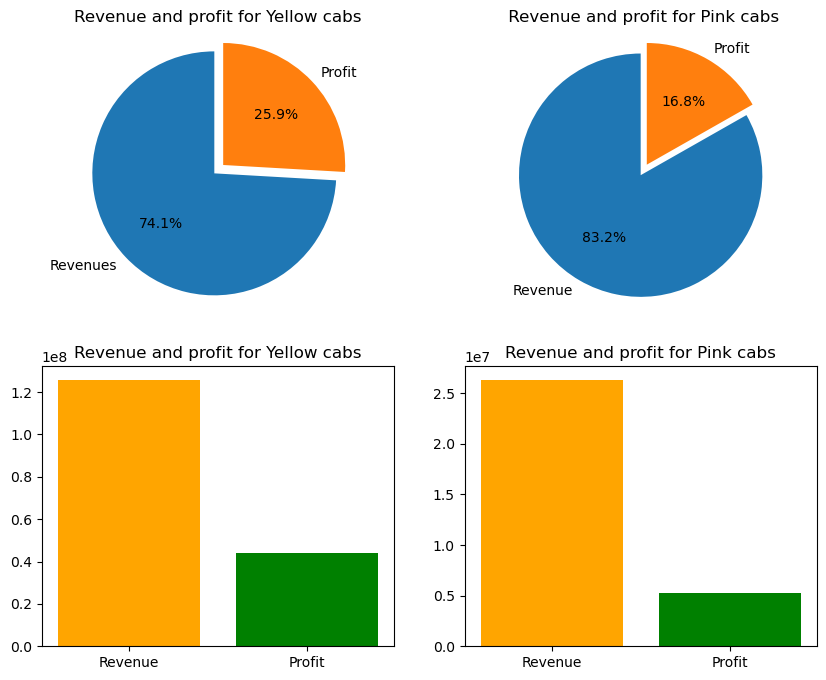

In [142]:
import matplotlib.pyplot as plt

p_c = [pink_revenue,pink_profit]
y_c = [yellow_revenue, yellow_profit]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# Pie chart for minority
labels1 = ['Revenues', 'Profit']
colors1 = ['orange', 'green']
explode1 = (0.1, 0)
ax1.pie(y_c, labels=labels1,explode=explode1, autopct='%1.1f%%', startangle=90)
ax1.set_title('Revenue and profit for Yellow cabs')

# Pie chart for majority
labels2 = ['Revenue', 'Profit']
colors2 = ['orange', 'green']
explode2 = (0, 0.1)
ax2.pie(p_c, labels=labels2, explode=explode2, autopct='%1.1f%%', startangle=90)
ax2.set_title(' Revenue and profit for Pink cabs')

# Bar chart for yellow cabs
ax3.bar(['Revenue', 'Profit'], y_c, color=colors1)
ax3.set_title('Revenue and profit for Yellow cabs')

# Bar chart for pink cabs
ax4.bar(['Revenue', 'Profit'], p_c, color=colors2)
ax4.set_title('Revenue and profit for Pink cabs')

# Set aspect ratio to be equal so that the charts are circular.
ax1.axis('equal')
ax2.axis('equal')

# Display the pie charts
plt.show()


In [35]:
#monthly_2016.head(36)
un_rides_day.head(12)


Date of Travel
Company    Year                
Pink Cab   2016       68.712329
           2017       83.071233
           2018       80.301370
Yellow Cab 2016      225.312329
           2017      269.010959
           2018      258.227397

In [67]:
#monthly_2016.sh
print(un_rides_day.index)

MultiIndex([(  'Pink Cab', 2016),
            (  'Pink Cab', 2017),
            (  'Pink Cab', 2018),
            ('Yellow Cab', 2016),
            ('Yellow Cab', 2017),
            ('Yellow Cab', 2018)],
           names=['Company', 'Year'])


In [44]:
index = pd.MultiIndex.from_tuples([('Pink Cab', 2016), ('Pink Cab', 2017),
                                   ('Pink Cab', 2018), ('Yellow Cab', 2016),
                                   ('Yellow Cab', 2017), ('Yellow Cab', 2018)],
                                  names=['Company', 'Year'])
df = pd.DataFrame(un_rides_day, index=index)
df_unstacked = df.unstack(level=0)

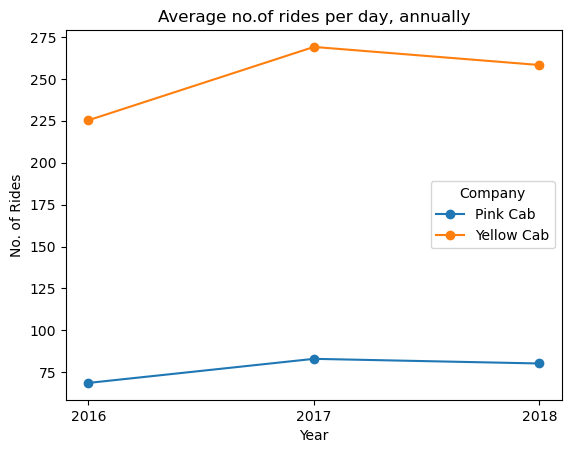

In [66]:






# plot the data as line plots
df_unstacked['Date of Travel'].plot(marker='o')
#df_unstacked['Date of Travel'].plot(marker='o')

# set plot title and axis labels
plt.title('Average no.of rides per day, annually')
plt.xlabel('Year')
plt.xticks([2016, 2017, 2018])
plt.ylabel('No. of Rides')

# show the plot
plt.show()


In [116]:
monthly_2016.head()
#print(monthly_2016.index)
index1 = pd.MultiIndex.from_tuples([(  'Pink Cab',  1),
            (  'Pink Cab',  2),
            (  'Pink Cab',  3),
            (  'Pink Cab',  4),
            (  'Pink Cab',  5),
            (  'Pink Cab',  6),
            (  'Pink Cab',  7),
            (  'Pink Cab',  8),
            (  'Pink Cab',  9),
            (  'Pink Cab', 10),
            (  'Pink Cab', 11),
            (  'Pink Cab', 12),
            ('Yellow Cab',  1),
            ('Yellow Cab',  2),
            ('Yellow Cab',  3),
            ('Yellow Cab',  4),
            ('Yellow Cab',  5),
            ('Yellow Cab',  6),
            ('Yellow Cab',  7),
            ('Yellow Cab',  8),
            ('Yellow Cab',  9),
            ('Yellow Cab', 10),
            ('Yellow Cab', 11),
            ('Yellow Cab', 12)],
           names=['Company', 'Month'])
df1 = pd.DataFrame(monthly_2016, index=index1)
df_unstacked1 = df1.unstack(level=0)
df2 = pd.DataFrame(monthly_2017, index=index1)
df_unstacked2 = df2.unstack(level=0)
df3 = pd.DataFrame(monthly_2018, index=index1)
df_unstacked3 = df3.unstack(level=0)


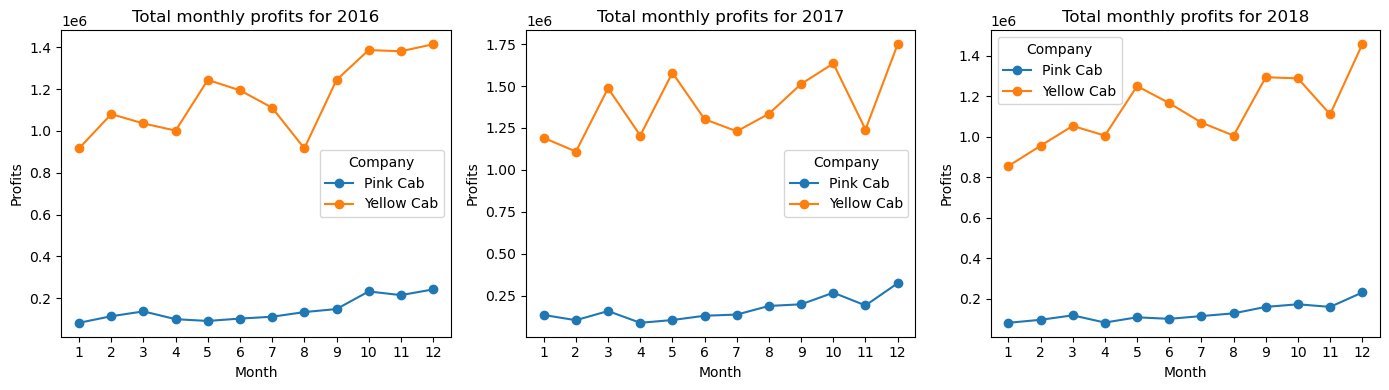

In [155]:
#import matplotlib.pyplot as plt

# create subplots with 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# plot for year 2016
#df_unstacked_2016 = df_unstacked.loc[2016]
df_unstacked1['Profit'].plot(marker='o', ax=axs[0])
axs[0].set_title('Total monthly profits for 2016')
axs[0].set_xlabel('Month')
axs[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs[0].set_ylabel('Profits')

# plot for year 2017
#df_unstacked_2017 = df_unstacked.loc[2017]
df_unstacked2['Profit'].plot(marker='o', ax=axs[1])
axs[1].set_title('Total monthly profits for 2017')
axs[1].set_xlabel('Month')
axs[1].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs[1].set_ylabel('Profits')

# plot for year 2018
#df_unstacked_2018 = df_unstacked.loc[2018]
df_unstacked3['Profit'].plot(marker='o', ax=axs[2])
axs[2].set_title('Total monthly profits for 2018')
axs[2].set_xlabel('Month')
axs[2].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs[2].set_ylabel('Profits')

# adjust the layout
plt.tight_layout()

# show the plots
plt.show()


In [131]:
city_rides.head()
#print(city_rides.index)
index2 = pd.MultiIndex.from_tuples([(  'Pink Cab',     'ATLANTA GA'),
            (  'Pink Cab',      'AUSTIN TX'),
            (  'Pink Cab',      'BOSTON MA'),
            (  'Pink Cab',     'CHICAGO IL'),
            (  'Pink Cab',      'DALLAS TX'),
            (  'Pink Cab',      'DENVER CO'),
            (  'Pink Cab', 'LOS ANGELES CA'),
            (  'Pink Cab',       'MIAMI FL'),
            (  'Pink Cab',   'NASHVILLE TN'),
            (  'Pink Cab',    'NEW YORK NY'),
            (  'Pink Cab',  'ORANGE COUNTY'),
            (  'Pink Cab',     'PHOENIX AZ'),
            (  'Pink Cab',  'PITTSBURGH PA'),
            (  'Pink Cab',  'SACRAMENTO CA'),
            (  'Pink Cab',   'SAN DIEGO CA'),
            (  'Pink Cab',     'SEATTLE WA'),
            (  'Pink Cab', 'SILICON VALLEY'),
            (  'Pink Cab',      'TUCSON AZ'),
            (  'Pink Cab',  'WASHINGTON DC'),
            ('Yellow Cab',     'ATLANTA GA'),
            ('Yellow Cab',      'AUSTIN TX'),
            ('Yellow Cab',      'BOSTON MA'),
            ('Yellow Cab',     'CHICAGO IL'),
            ('Yellow Cab',      'DALLAS TX'),
            ('Yellow Cab',      'DENVER CO'),
            ('Yellow Cab', 'LOS ANGELES CA'),
            ('Yellow Cab',       'MIAMI FL'),
            ('Yellow Cab',   'NASHVILLE TN'),
            ('Yellow Cab',    'NEW YORK NY'),
            ('Yellow Cab',  'ORANGE COUNTY'),
            ('Yellow Cab',     'PHOENIX AZ'),
            ('Yellow Cab',  'PITTSBURGH PA'),
            ('Yellow Cab',  'SACRAMENTO CA'),
            ('Yellow Cab',   'SAN DIEGO CA'),
            ('Yellow Cab',     'SEATTLE WA'),
            ('Yellow Cab', 'SILICON VALLEY'),
            ('Yellow Cab',      'TUCSON AZ'),
            ('Yellow Cab',  'WASHINGTON DC')],
           names=['Company', 'City'])
df4 = pd.DataFrame(city_rides, index=index2)
df_unstacked4 = df4.unstack(level=0)
df5 = pd.DataFrame(city_pro, index=index2)
df_unstacked5 = df5.unstack(level=0)

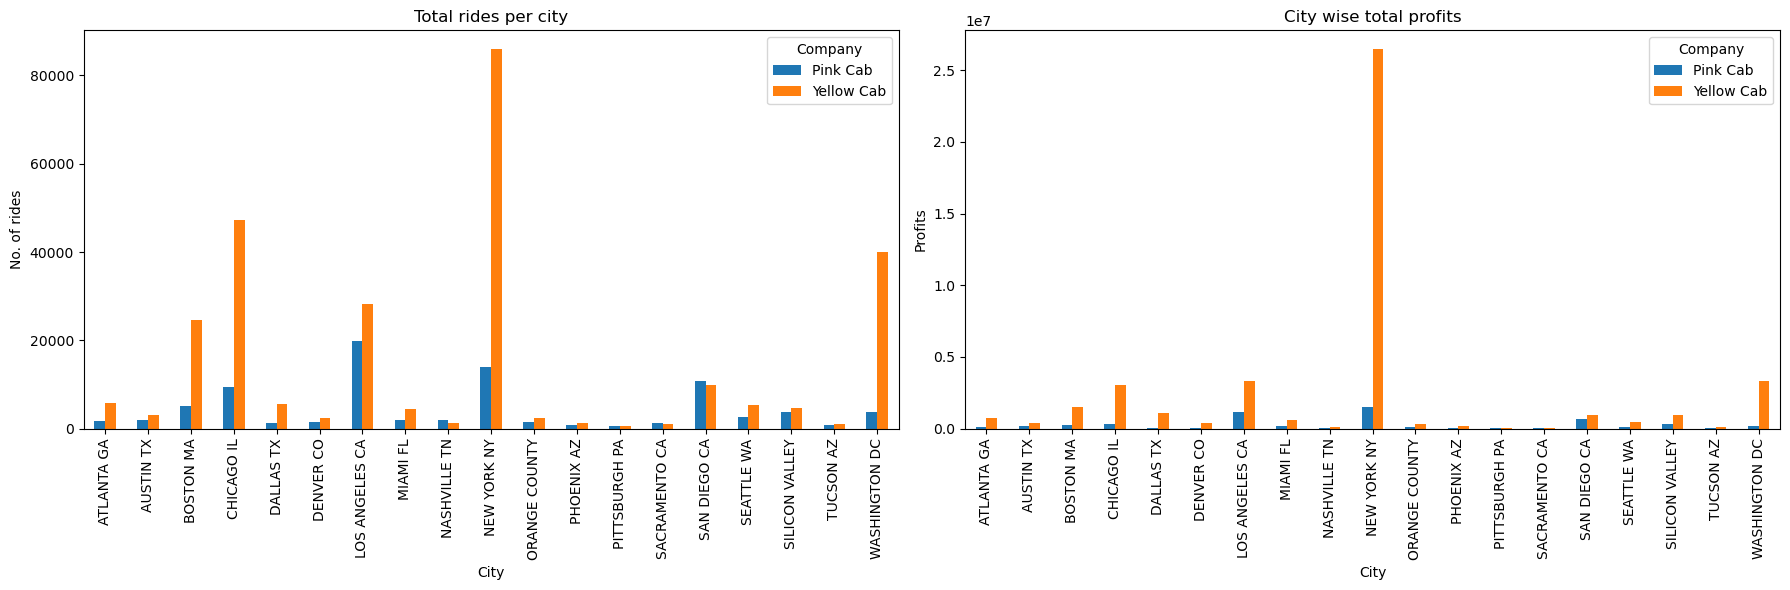

In [141]:
import matplotlib.pyplot as plt

# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# plot for year 2016
df_unstacked4['Transaction ID'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Total rides per city')
axs[0].set_xlabel('City')
axs[0].set_ylabel('No. of rides')

# plot for year 2017
df_unstacked5['Profit'].plot(kind='bar', ax=axs[1])
axs[1].set_title('City wise total profits')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Profits')

# adjust the layout
plt.tight_layout()

# show the plots
plt.show()


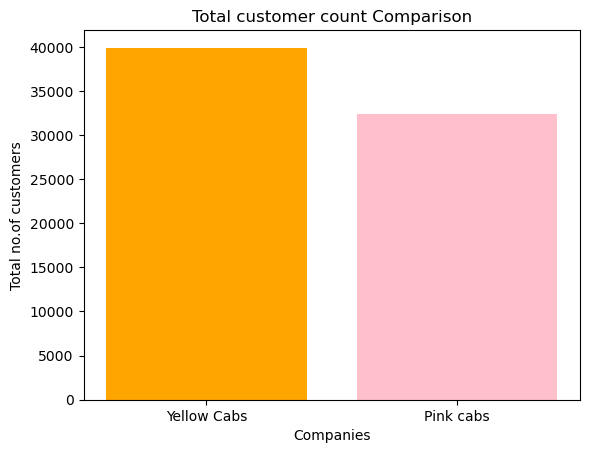

In [145]:
# example data
customers = [cust_yellow,cust_pink] # revenue for company1 and company2
companies = ['Yellow Cabs', 'Pink cabs']

# create bar chart
plt.bar(companies, customers, color=['orange', 'pink'])

# set axis labels and chart title
plt.xlabel('Companies')
plt.ylabel('Total no.of customers')
plt.title('Total customer count Comparison')

# show the chart
plt.show()


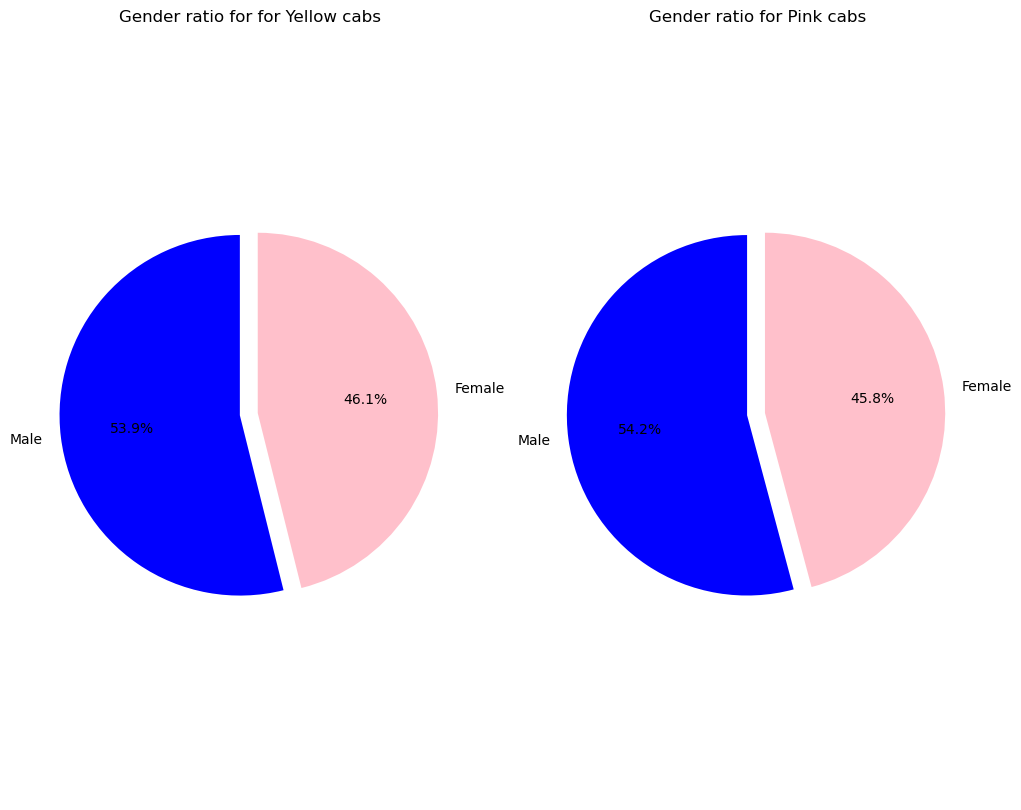

In [152]:


p_gender = [male_customers_pink, female_customers_pink]
y_gender = [male_customers_yellow, female_customers_yellow]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

# Pie chart for minority
labels1 = ['Male', 'Female']
colors1 = ['blue', 'pink']
explode1 = (0.1, 0)
ax1.pie(y_gender, labels=labels1, explode=explode1, autopct='%1.1f%%', startangle=90, colors=colors1)
ax1.set_title('Gender ratio for for Yellow cabs')

# Pie chart for majority
labels2 = ['Male', 'Female']
colors2 = ['gray', 'pink']
explode2 = (0, 0.1)
ax2.pie(p_gender, labels=labels2, explode=explode2, autopct='%1.1f%%', startangle=90, colors=colors2)
ax2.set_title('Gender ratio for Pink cabs')

# Set aspect ratio to be equal so that the charts are circular.
ax1.axis('equal')
ax2.axis('equal')

# Display the pie charts
plt.show()


In [157]:
print(un_rides_cab.index)

MultiIndex([(  'Pink Cab', 2016),
            (  'Pink Cab', 2017),
            (  'Pink Cab', 2018),
            ('Yellow Cab', 2016),
            ('Yellow Cab', 2017),
            ('Yellow Cab', 2018)],
           names=['Company', 'Year'])


In [159]:
#un_rides_cab.head()
#print(city_rides.index)
index4 = pd.MultiIndex.from_tuples([(  'Pink Cab', 2016),
            (  'Pink Cab', 2017),
            (  'Pink Cab', 2018),
            ('Yellow Cab', 2016),
            ('Yellow Cab', 2017),
            ('Yellow Cab', 2018)],
           names=['Company', 'Year'])
df6 = pd.DataFrame(un_rides_cab, index=index4)
df_unstacked6 = df6.unstack(level=0)


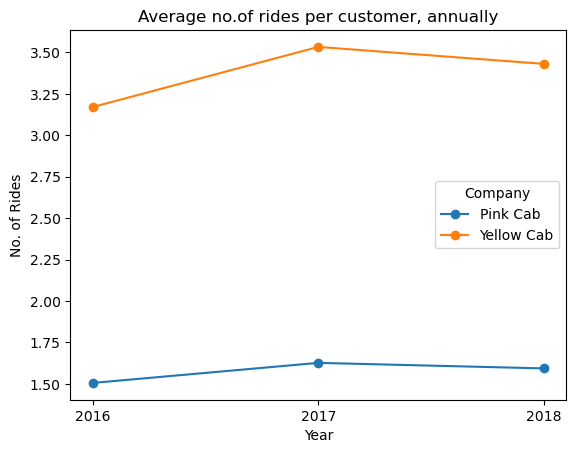

In [161]:
df_unstacked6['Transaction ID'].plot(marker='o')
#df_unstacked['Date of Travel'].plot(marker='o')

# set plot title and axis labels
plt.title('Average no.of rides per customer, annually')
plt.xlabel('Year')
plt.xticks([2016, 2017, 2018])
plt.ylabel('No. of Rides')

# show the plot
plt.show()


In [166]:
final_df_unique = final_df.drop_duplicates(subset=['Customer ID'])

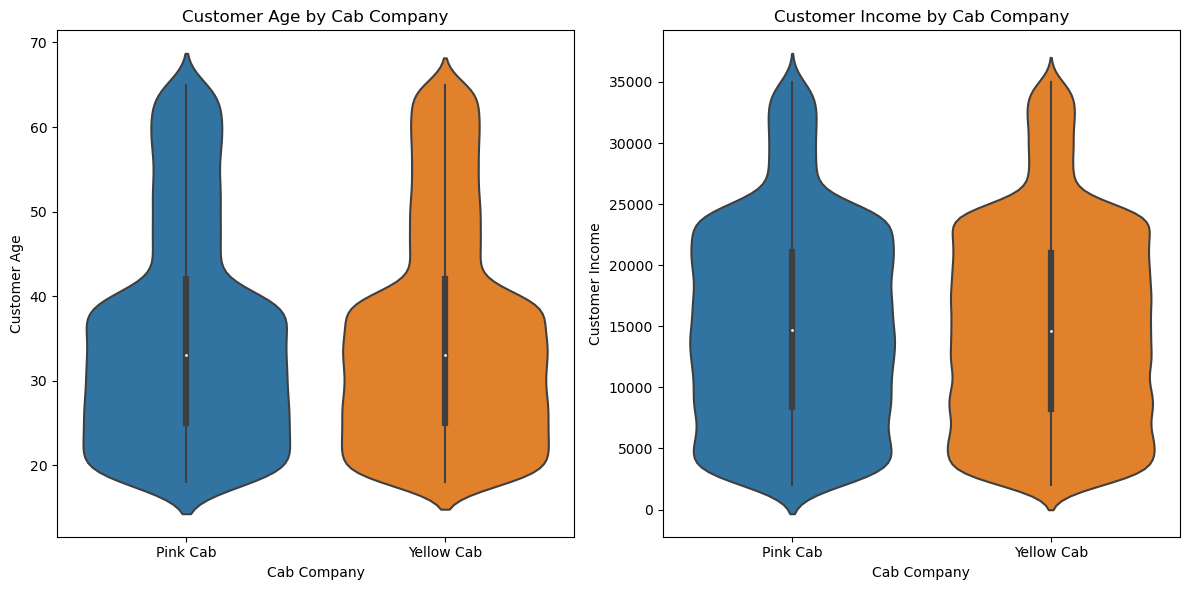

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot violin plot for customer_age for both companies
sns.violinplot(x="Company", y="Age", data=final_df_unique, ax=axs[0],split=True)
axs[0].set_title("Customer Age by Cab Company")
axs[0].set_xlabel("Cab Company")
axs[0].set_ylabel("Customer Age")

# plot violin plot for customer_income for both companies
sns.violinplot(x="Company", y="Income (USD/Month)", data=final_df_unique, ax=axs[1],split=True)
axs[1].set_title("Customer Income by Cab Company")
axs[1].set_xlabel("Cab Company")
axs[1].set_ylabel("Customer Income")

# adjust the layout
plt.tight_layout()

# show the plots
plt.show()


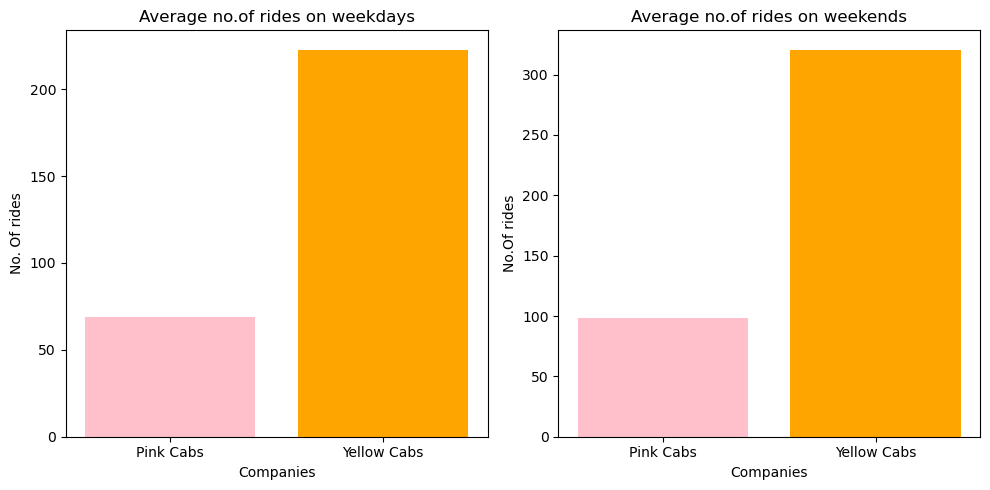

In [172]:
# original data
weekdays = [avg_weekday_pink, avg_weekday_yellow]
weekends = [avg_weekend_pink, avg_weekend_yellow]
companies = ['Pink Cabs', 'Yellow Cabs']



# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot customer counts in first subplot
ax1.bar(companies, weekdays, color=[ 'pink','orange'])
ax1.set_xlabel('Companies')
ax1.set_ylabel('No. Of rides')
ax1.set_title('Average no.of rides on weekdays')

# plot average fares in second subplot
ax2.bar(companies,weekends , color=[ 'pink','orange'])
ax2.set_xlabel('Companies')
ax2.set_ylabel('No.Of rides')
ax2.set_title('Average no.of rides on weekends')

# adjust layout and show figure
fig.tight_layout()
plt.show()


In [175]:
new_df = pd.merge(final_df, city, on='City', how='left')

In [186]:
new_df.head()

,KM Travelled,Price Charged,Cost of Trip,Profit,Cost per KM,profit per KM,Net profit perecentage,Age,Income (USD/Month),Month,Population,Users,User perecentage
0,30.45,370.95,313.635,57.315,10.3,1.882266,18.274427,28,10813,8,814885,24701,3.031225
1,28.62,358.52,334.854,23.666,11.7,0.826904,7.067558,27,9237,6,814885,24701,3.031225
2,9.04,125.20,97.632,27.568,10.8,3.049558,28.236644,53,11242,2,814885,24701,3.031225
3,33.17,377.40,351.602,25.798,10.6,0.777751,7.337273,23,23327,7,814885,24701,3.031225
4,8.73,114.62,97.776,16.844,11.2,1.929439,17.227131,33,8536,3,814885,24701,3.031225


In [185]:
cols_to_drop = ['Transaction ID', 'Date of Travel', 'Company', 'City', 'Payment_Mode','Customer ID' ,'Gender', 'Day type', 'Year']

# use the drop() method to drop the columns
new_df = new_df.drop(cols_to_drop, axis=1)

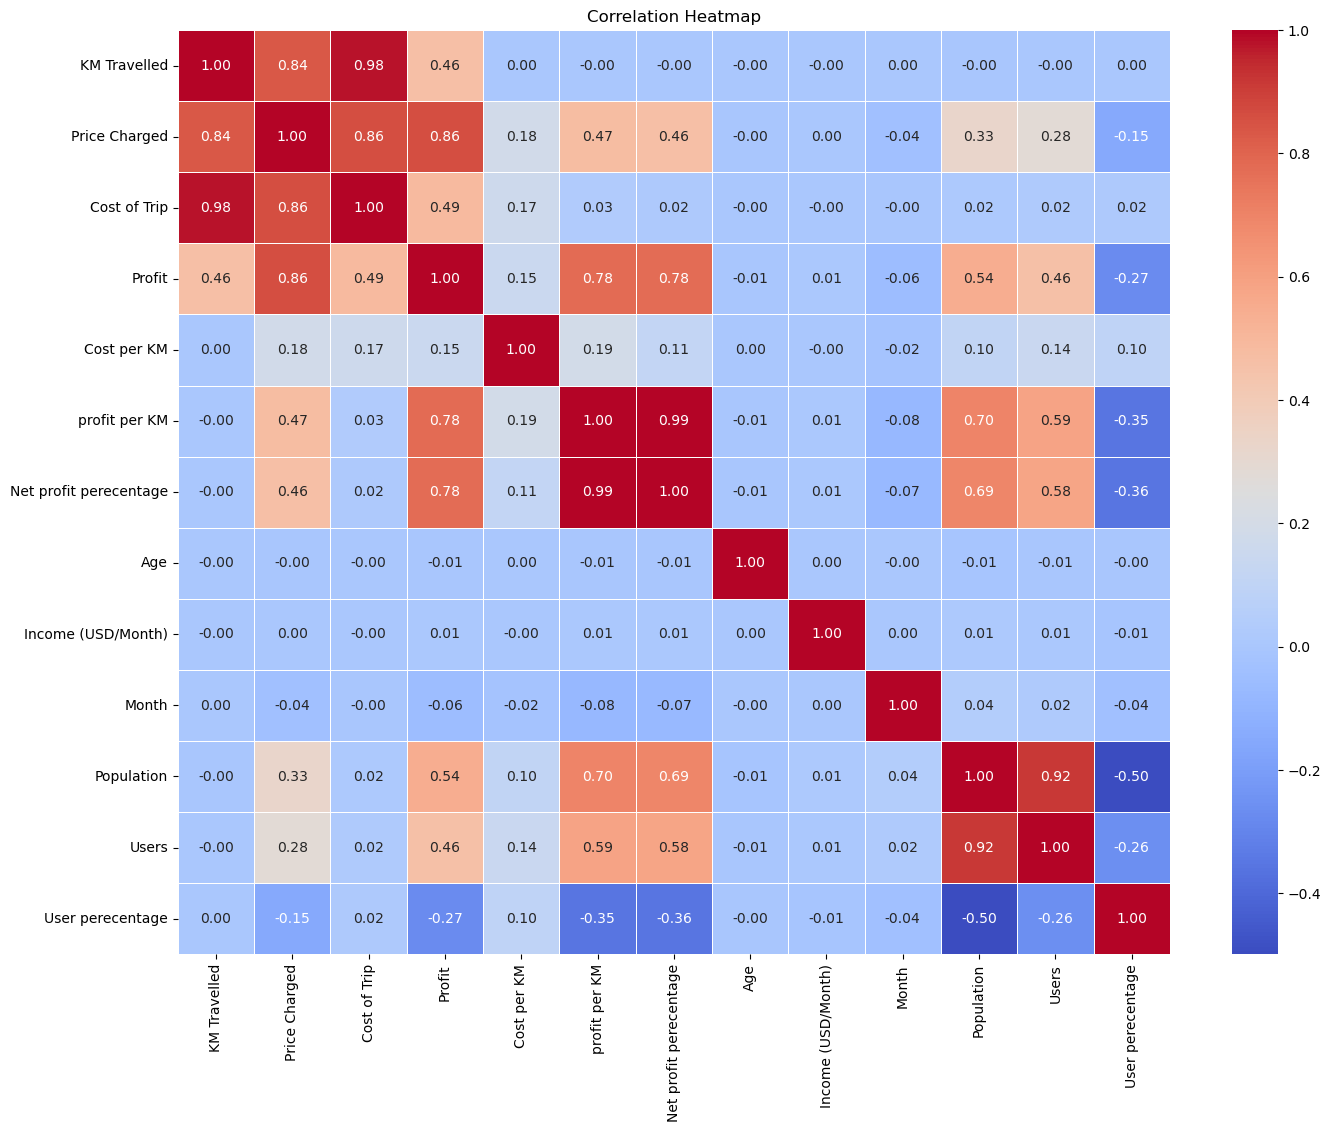

In [189]:


corr_matrix = new_df.corr()

# set the size of the plot
plt.figure(figsize=(16,12))

# create a heatmap using the seaborn library
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={'size': 10})

# set the font size of the x and y axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# set the title of the heatmap
plt.title('Correlation Heatmap', fontsize=12)

# show the plot
plt.show()

